In [2]:
!unzip archive.zip -d archive

Archive:  archive.zip
replace archive/README? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
!pip3 install numpy
!pip3 install pillow
!pip3 install scikit-learn
!pip3 install matplotlib

In [4]:
import numpy as np
import os
from PIL import Image
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# lists for storing the data matrix D and label vector y
D = []
y = []

# 2) Generate the Data Matrix and the Label vector
for subject in range(1, 41):
    # every subject has 10 images, get 10 images per subject
    imageCount = 0

    for image in os.listdir(f'archive/s{subject}'):
        temp = Image.open(f'archive/s{subject}/{image}')
        vector = np.array(temp).flatten()

        y.append(subject)
        D.append(vector)

# convert the dataMatrix and labels to numpy arrays
D = np.array(D)
y = np.array(y)

In [5]:
# 3) Split the data-set into Training and Test sets
training_data = D[::2]
testing_data = D[1::2]

training_labels = y[::2]
testing_labels = y[1::2]


In [6]:
# 4) Classification using PCA
# Calculate Projection Matrix U
training_mean = np.mean(training_data, axis=0)
training_std = np.std(training_data, axis=0)
training_standarized = (training_data - training_mean) / training_std

covariance_matrix = np.cov(training_standarized.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

# index to sort the eigen values and eigen vectors in decreasing order of eigen values
idx = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvectors[idx]
sorted_eigenvectors = eigenvectors[:, idx]

# sum to get the variance fraction to choose how many dimension aka how many eigen vectors
cumulative_sum = np.cumsum(sorted_eigenvalues)


Accuracy of alpha=0.8, K=1: 0.945
Accuracy of alpha=0.8, K=3: 0.915
Accuracy of alpha=0.8, K=5: 0.885
Accuracy of alpha=0.8, K=7: 0.86


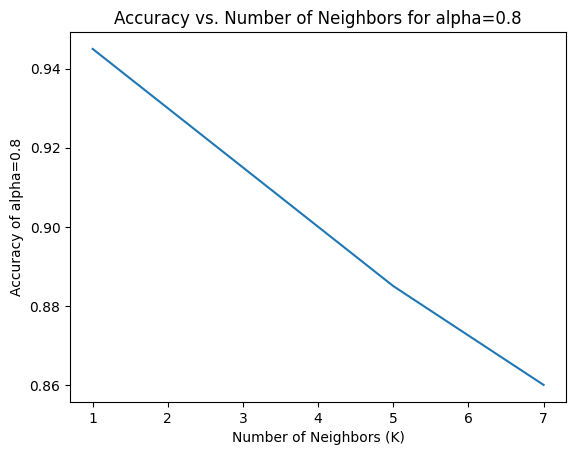

Accuracy of alpha=0.85, K=1: 0.945
Accuracy of alpha=0.85, K=3: 0.915
Accuracy of alpha=0.85, K=5: 0.885
Accuracy of alpha=0.85, K=7: 0.86


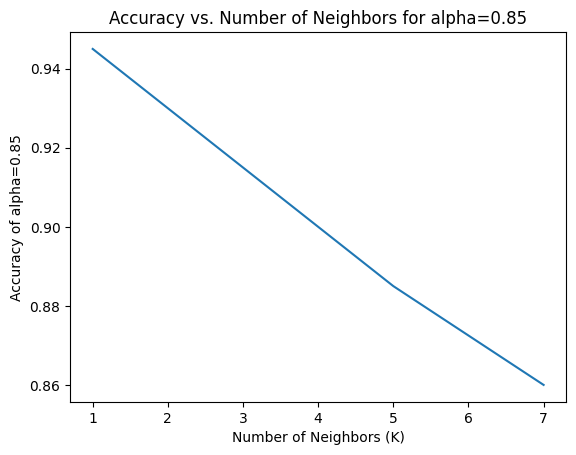

Accuracy of alpha=0.9, K=1: 0.945
Accuracy of alpha=0.9, K=3: 0.915
Accuracy of alpha=0.9, K=5: 0.885
Accuracy of alpha=0.9, K=7: 0.86


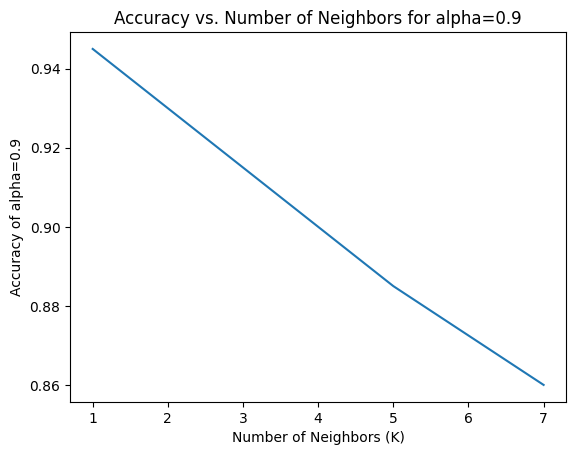

Accuracy of alpha=0.95, K=1: 0.945
Accuracy of alpha=0.95, K=3: 0.915
Accuracy of alpha=0.95, K=5: 0.885
Accuracy of alpha=0.95, K=7: 0.86


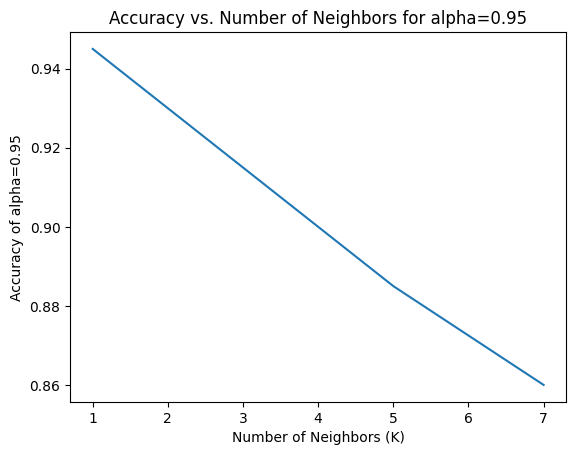

In [8]:
# alpha=[0.8,0.85,0.9,0.95]    loop on the array and mark accuracy
alphas = [0.8, 0.85, 0.9, 0.95]  # for example

for alpha in alphas:
    num_eigenvectors = np.where(cumulative_sum >= alpha)[0][0] + 1
    # final eigen vectors chosen for projection
    U = sorted_eigenvectors[:, :num_eigenvectors]

    # project all the data on the eigen vectors
    D_train_pca = np.dot(training_data, U)
    D_test_pca = np.dot(testing_data, U)

    # training: fitting the points on the graph so the classifier can classify any new testing point
    # 5) Classifier Tuning
    knn_nums = [1, 3, 5, 7]
    accuracies = []
    for knn_num in knn_nums:
        knn = KNeighborsClassifier(n_neighbors=knn_num, weights='distance')
        knn.fit(D_train_pca, training_labels)

        # testing
        predicted_labels = knn.predict(D_test_pca)

        # accuracy
        accuracy = accuracy_score(testing_labels, predicted_labels)
        accuracies.append(accuracy)
        print(f'Accuracy of alpha={alpha}, K={knn_num}: {accuracy}')

    plt.plot(knn_nums, accuracies)
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel(f'Accuracy of alpha={alpha}')
    plt.title(f'Accuracy vs. Number of Neighbors for alpha={alpha}')
    plt.show()